### Project 3
  


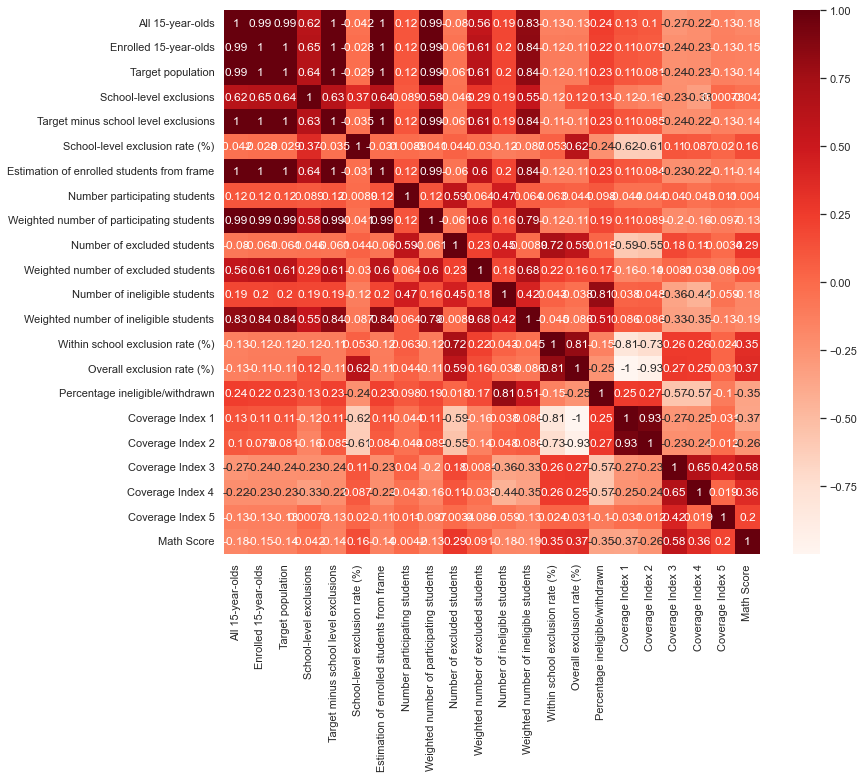

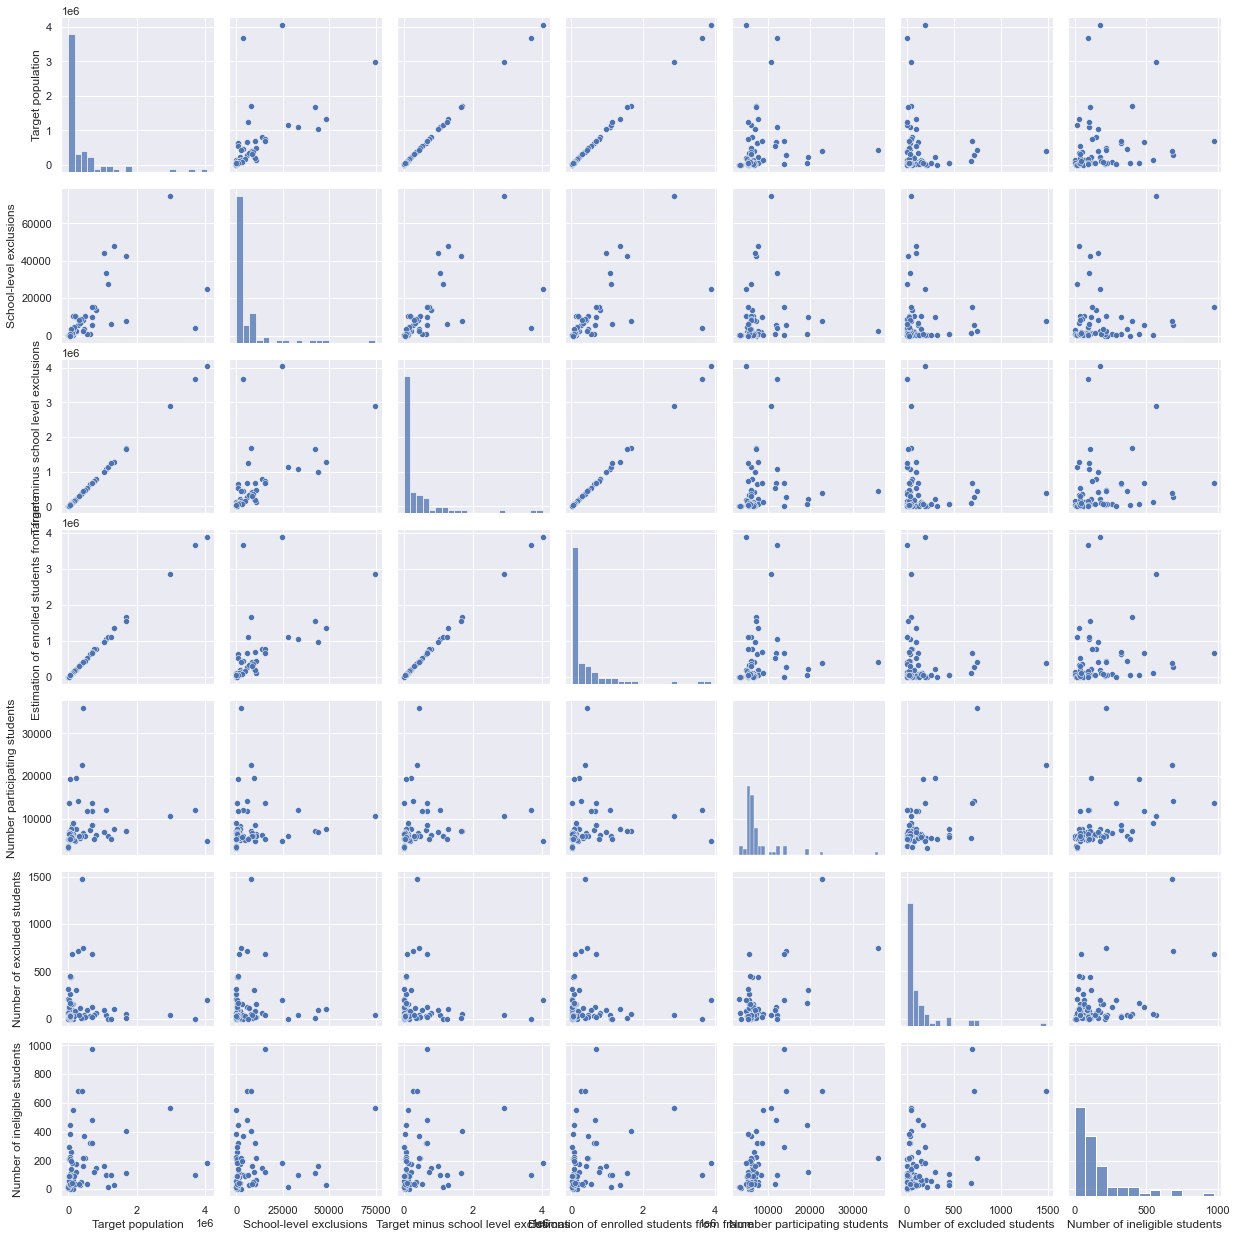

C:\Users\karrin3\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Math Score                                    1.000000
Coverage Index 3                              0.578603
Overall exclusion rate (%)                    0.366693
Coverage Index 4                              0.363604
Within school exclusion rate (%)              0.349788
Number of excluded students                   0.286275
Coverage Index 5                              0.200771
School-level exclusion rate (%)               0.158699
Weighted number of excluded students          0.091272
Number participating students                -0.004156
School-level exclusions                      -0.042465
Weighted number of participating students    -0.132477
Estimation of enrolled students from frame   -0.142954
Target population                            -0.143814
Target minus school level exclusions         -0.144663
Enrolled 15-year-olds                        -0.145770
All 15-year-olds                             -0.177724
Number of ineligible students                -0.177734
Weighted n

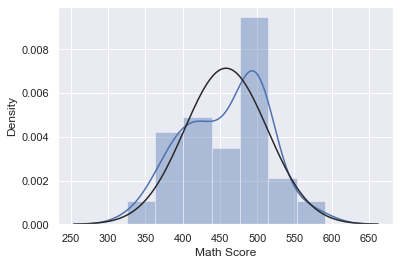

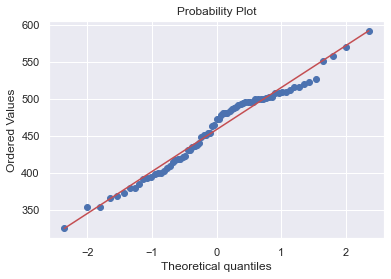

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\karrin3\Downloads\Math-PISA2018-TecReport.csv')
#print (df)
#data.head()
data.describe()
#print(data.columns)

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

sns.set()
cols = ['Target population', 'School-level exclusions',
       'Target minus school level exclusions',
       'Estimation of enrolled students from frame',
       'Number participating students',
       'Number of excluded students',
       'Number of ineligible students']
sns.pairplot(data[cols], height = 2.5)
plt.show()

from scipy.stats import norm
from scipy import stats

sns.distplot(data['Math Score'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['Math Score'], plot=plt)


features = data[['All 15-year-olds', 'Enrolled 15-year-olds',
       'Target population', 'School-level exclusions',
       'Target minus school level exclusions',
       'School-level exclusion rate (%)',
       'Estimation of enrolled students from frame',
       'Number participating students',
       'Weighted number of participating students',
       'Number of excluded students', 'Weighted number of excluded students',
       'Number of ineligible students',
       'Weighted number of ineligible students',
       'Within school exclusion rate (%)', 'Overall exclusion rate (%)',
       'Percentage ineligible/withdrawn', 'Coverage Index 1',
       'Coverage Index 2', 'Coverage Index 3', 'Coverage Index 4',
       'Coverage Index 5']]
output = data['Math Score']


corr_Math_Score=cor["Math Score"].sort_values(ascending=False)
print(corr_Math_Score)




In [3]:
# feature selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


reg = LinearRegression() 
feature_selector = sfs(reg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')
feature_selector = feature_selector.fit(features, output)

feat_names = list(feature_selector.k_feature_names_)
print(feat_names)
final_features = data[['School-level exclusions','Number of excluded students', 'Within school exclusion rate (%)','Coverage Index 3']]


x_train, x_test, y_train, y_test = train_test_split(final_features, output, test_size = 0.3, random_state = 100)
mlr = LinearRegression() 
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(final_features, mlr.coef_))





[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2022-05-05 23:17:10] Features: 1/5 -- score: -2207.9916409971943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2022-05-05 23:17:10] Features: 2/5 -- score: -2080.4991093759086[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished

[2022-05-05 23:17:10] Features: 3/5 -- score: -2073.659761212678[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

['School-level exclusions', 'Number of excluded students', 'Within school exclusion rate (%)', 'Coverage Index 3', 'Coverage Index 5']
Intercept:  199.77071406846886
Coefficients:


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2022-05-05 23:17:10] Features: 4/5 -- score: -2067.9066412577467[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-05-05 23:17:10] Features: 5/5 -- score: -2101.0036954447255

[('School-level exclusions', 0.00011607697279771593),
 ('Number of excluded students', 0.02405117152979086),
 ('Within school exclusion rate (%)', 7.486071772089655),
 ('Coverage Index 3', 277.4367483860213)]

In [4]:


y_pred_mlr= mlr.predict(x_test)

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

mlr_diff.head()




,Actual value,Predicted value
57,430,407.030096
41,440,406.185702
20,507,490.153820
56,414,469.911259
32,527,455.198709


In [5]:
#Evaluating the Model

from sklearn import metrics


rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Root Mean Square Error:', rootMeanSqErr)


Root Mean Square Error: 63.61859695803295


In [6]:
#Lasso Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(features, output, test_size = 0.3, random_state = 100)


df = data.iloc[: , :-1]
X_numerical = df.iloc[: , 1:].astype('float64')

#print(X_numerical)
list_numerical = X_numerical.columns
scaler = StandardScaler().fit(x_train[list_numerical]) 


x_train[list_numerical] = scaler.transform(x_train[list_numerical])

x_test[list_numerical] = scaler.transform(x_test[list_numerical])

reg = Lasso(alpha=.2)
reg.fit(x_train, y_train)
pred_train_lasso= reg.predict(x_train)

print('R squared training set', round(reg.score(x_train, y_train)*100, 2))
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))


R squared training set 67.26
29.379164136414932


In [8]:
#Ridge Regression
import numpy as np

 
from sklearn.linear_model import Ridge

df = data.iloc[: , :-1]
X_numerical = df.iloc[: , 1:].astype('float64')

#print(X_numerical)
list_numerical = X_numerical.columns
scaler = StandardScaler().fit(x_train[list_numerical]) 


x_train[list_numerical] = scaler.transform(x_train[list_numerical])

x_test[list_numerical] = scaler.transform(x_test[list_numerical])

ridge_model = Ridge(alpha=10)
ridge=ridge_model.fit(x_train , y_train)
ridge_predict = ridge.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,ridge_predict)))







30.79041835715916
